In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report
from tqdm import tqdm
import joblib
cr=pd.read_csv("credit_record.csv")
ar=pd.read_csv("application_record.csv")
cr.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [23]:
ar=ar.drop_duplicates(subset=['ID'],keep='last')
ar



,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [24]:
ar['NAME_FAMILY_STATUS'].value_counts()

Married                 299798
Single / not married     55268
Civil marriage           36524
Separated                27249
Widow                    19671
Name: NAME_FAMILY_STATUS, dtype: int64

C:\Users\theo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


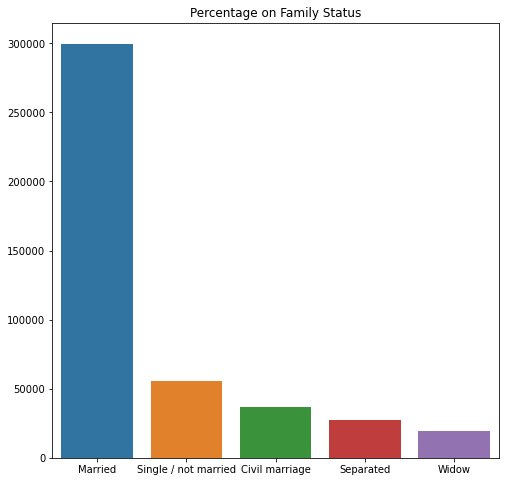

In [25]:
plt.figure(figsize=(8,8))
sns.barplot(ar['NAME_FAMILY_STATUS'].value_counts().index, ar['NAME_FAMILY_STATUS'].value_counts().values)
plt.title('Percentage on Family Status')
plt.show()

C:\Users\theo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


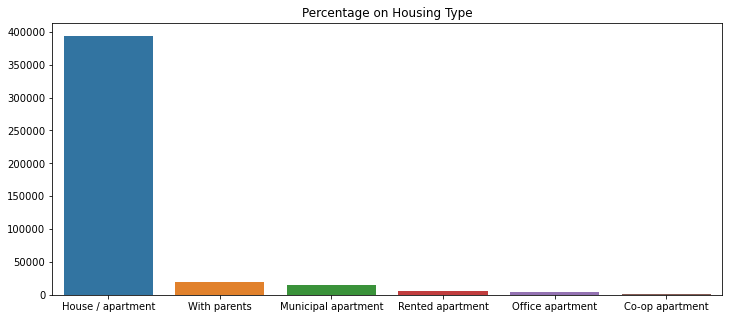

In [27]:
plt.figure(figsize=(12,5))
sns.barplot(ar['NAME_HOUSING_TYPE'].value_counts().index, ar['NAME_HOUSING_TYPE'].value_counts().values)
plt.title('Percentage on Housing Type')
plt.show()

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ar.columns: 
    if (i!='ID'):
        ar[i]=le.fit_transform(ar[i])
ar

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,765,4,1,0,4,12473,4905,0,1,0,0,18,1
1,5008805,1,1,1,0,765,4,1,0,4,12473,4905,0,1,0,0,18,1
2,5008806,1,1,1,0,304,4,4,1,1,3040,8298,0,0,0,0,16,1
3,5008808,0,0,1,0,653,0,4,3,1,5386,6381,0,0,1,1,14,0
4,5008809,0,0,1,0,653,0,4,3,1,5386,6381,0,0,1,1,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,1,0,1,0,382,1,4,2,1,1809,9405,0,0,0,0,18,0
438553,6840222,0,0,0,0,267,4,4,3,1,8541,6425,0,0,0,0,8,0
438554,6841878,0,0,0,0,84,0,1,3,5,16226,9060,0,1,0,0,14,0
438555,6842765,0,0,1,0,144,1,4,1,1,2841,9405,0,0,0,0,18,1


In [5]:
miss = ar.isnull().sum()
miss

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [6]:
cr['STATUS'].replace(['C','X'],0, inplace=True)

In [7]:
cr['STATUS'].replace(['2','3','4','5'],1, inplace=True)

In [8]:
cr['STATUS'] = cr['STATUS'].astype('int')

In [9]:
cr_group=cr.groupby('ID').agg(max).reset_index()

In [10]:
cr_group=cr_group.drop('MONTHS_BALANCE',axis=1)
cr_group

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0
...,...,...
45980,5150482,0
45981,5150483,0
45982,5150484,0
45983,5150485,0


In [15]:
cr_group['STATUS'].value_counts()
status=cr_group['STATUS']
status

0        0
1        0
2        0
3        0
4        0
        ..
45980    0
45981    0
45982    0
45983    0
45984    0
Name: STATUS, Length: 45985, dtype: int32

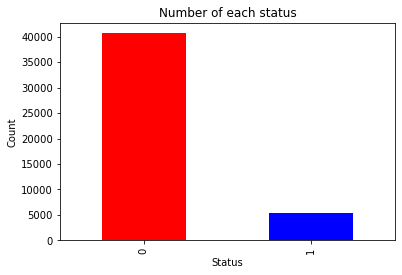

In [19]:
counts = cr_group['STATUS'].value_counts()
counts.plot(kind='bar', color=['red', 'blue'])
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Number of each status')
plt.show()

In [11]:
df=pd.merge(ar,cr_group,on='ID',how='inner')
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,1,1,1,0,765,4,1,0,4,12473,4905,0,1,0,0,18,1,1
1,5008805,1,1,1,0,765,4,1,0,4,12473,4905,0,1,0,0,18,1,1
2,5008806,1,1,1,0,304,4,4,1,1,3040,8298,0,0,0,0,16,1,0
3,5008808,0,0,1,0,653,0,4,3,1,5386,6381,0,0,1,1,14,0,0
4,5008809,0,0,1,0,653,0,4,3,1,5386,6381,0,0,1,1,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,693,4,4,1,1,7143,7012,0,0,0,0,10,1,1
36453,5149834,0,0,1,0,440,0,1,1,1,12092,8107,0,0,1,1,11,1,1
36454,5149838,0,0,1,0,440,1,1,1,1,12092,8107,0,0,1,1,11,1,1
36455,5150049,0,0,1,0,663,4,4,1,1,6535,8777,0,0,0,0,14,1,1


In [12]:
verification =df['STATUS']

In [13]:
label=df.drop(['ID','STATUS'],axis=1)

In [14]:
label

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,1,1,1,0,765,4,1,0,4,12473,4905,0,1,0,0,18,1
1,1,1,1,0,765,4,1,0,4,12473,4905,0,1,0,0,18,1
2,1,1,1,0,304,4,4,1,1,3040,8298,0,0,0,0,16,1
3,0,0,1,0,653,0,4,3,1,5386,6381,0,0,1,1,14,0
4,0,0,1,0,653,0,4,3,1,5386,6381,0,0,1,1,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,0,693,4,4,1,1,7143,7012,0,0,0,0,10,1
36453,0,0,1,0,440,0,1,1,1,12092,8107,0,0,1,1,11,1
36454,0,0,1,0,440,1,1,1,1,12092,8107,0,0,1,1,11,1
36455,0,0,1,0,663,4,4,1,1,6535,8777,0,0,0,0,14,1


In [15]:
X_train,X_test,y_train,y_test=train_test_split(label,verification,test_size=0.33)

In [35]:
def Test(number):
    RDFM=RandomForestClassifier(min_samples_leaf=2,n_estimators=125,criterion=number)
    RDFM.fit(X_train,y_train)
    from sklearn.metrics import accuracy_score
    y_pred=RDFM.predict(X_test)
    return accuracy_score(y_test,y_pred)

In [37]:
a=[]
c=[10,50,100,125,150,175,200,250]
for i in tqdm(c):
    g=[]
    for b in range(30):
         g.append(Test(i))
    a.append(np.mean(g))
x = [10,50,100,125,150,175,200,250]
plt.plot(x,a)

100%|██████████| 2/2 [02:11<00:00, 65.70s/it]

[0.8902806638406339, 0.8901781508879837]


In [104]:
RDFM=RandomForestClassifier(min_samples_leaf=2,n_estimators=125,criterion='gini')
RDFM.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
y_pred=RDFM.predict(X_test)
accuracy_score(y_test,y_pred)

0.8897847227994348

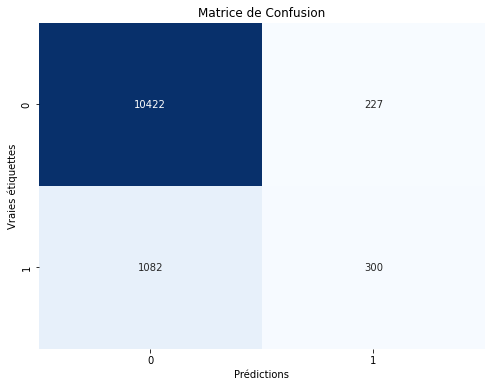

In [69]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.show()

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10649
           1       0.57      0.22      0.31      1382

    accuracy                           0.89     12031
   macro avg       0.74      0.60      0.63     12031
weighted avg       0.87      0.89      0.87     12031



In [71]:
filename = 'random_forest_model.joblib'
joblib.dump(RDFM, filename)

['random_forest_model.joblib']